In [1]:
from datetime import datetime
start_time = datetime.now()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('applications data.csv')
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [22]:
df.shape[0]

1000000

In [23]:
df.shape[1]

10

In [26]:
statistics_of_data = []
for col in df.columns:
  statistics_of_data.append((col,
                             len(df[col]),
                             100-df[col].isnull().sum()*100/df.shape[0],
                             df[col].nunique(),
                             df[col].value_counts().idxmax()
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Column Name', '# of Records', '% populated', 'Unique Values', 'Most Common Field Value'])
stats_df.loc[0,'Most Common Field Value'] = 'N/A'
stats_df

,Column Name,# of Records,% populated,Unique Values,Most Common Field Value
0,record,1000000,100.0,1000000,N/A
1,date,1000000,100.0,365,20160816
2,ssn,1000000,100.0,835819,999999999
3,firstname,1000000,100.0,78136,EAMSTRMT
4,lastname,1000000,100.0,177001,ERJSAXA
5,address,1000000,100.0,828774,123 MAIN ST
6,zip5,1000000,100.0,26370,68138
7,dob,1000000,100.0,42673,19070626
8,homephone,1000000,100.0,28244,9999999999
9,fraud_label,1000000,100.0,2,0


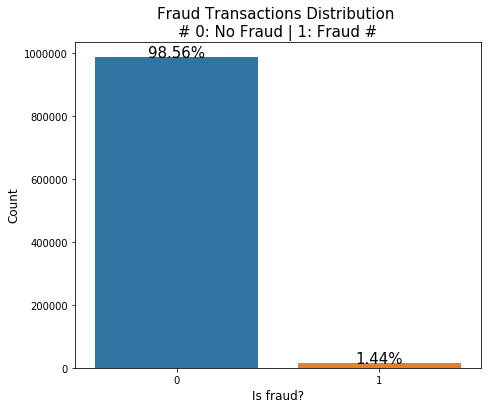

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(121)
g = sns.countplot(x='fraud_label', data=df)
total = len(df)
g.set_title("Fraud Transactions Distribution \n# 0: No Fraud | 1: Fraud #", fontsize=15)
g.set_xlabel("Is fraud?", fontsize=12)
g.set_ylabel('Count', fontsize=12)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 


In [40]:
df_date = df['date'].value_counts()
df_date

20160816    2877
20160304    2861
20160718    2849
20160417    2848
20160101    2840
            ... 
20160320    2637
20160409    2633
20161029    2628
20160822    2627
20160311    2607
Name: date, Length: 365, dtype: int64

In [82]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')
df.head()
df1 = df['date'].groupby(df.date.dt.month).agg('count')
df1

date
1     85199
2     76792
3     84871
4     82515
5     85083
6     82035
7     84943
8     84830
9     82374
10    84865
11    81602
12    84891
Name: date, dtype: int64

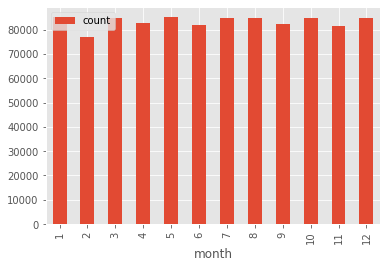

In [84]:
df_date = pd.DataFrame({'month':['1', '2', '3','4','5','6','7','8','9','10','11','12'], 
                   'count':[85199,76792,84871,82515,85083,82035,84943,84830,82374,84865,81602,84891]})
ax = df_date.plot.bar(x='month', y='count')
ax

In [159]:
df2 = df['ssn'].value_counts()
df_ssn = df2.head(35)
df_ssn1 = pd.DataFrame(data=df_ssn)
df_ssn2 = df_ssn1.drop(index=999999999)
df_ssn1

,ssn
999999999,16935
938972725,114
810776805,81
829352390,74
473311863,44
165764866,34
189622157,30
295308935,30
588726212,29
163830210,29


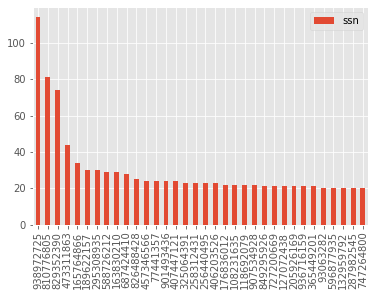

In [158]:
df_ssn2.plot(kind='bar')

In [179]:
df1 = df['firstname'].value_counts()
count=0
for i in df1.index:
    if df1[i] >= 4000:
        count+=1
    else:
        count+=0
print(count)

23


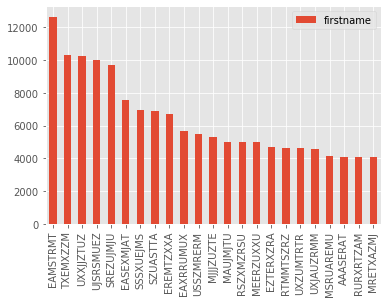

In [181]:
df_f = df1.head(23)
df_f1 = pd.DataFrame(data=df_f)
df_f1.plot(kind='bar')

In [208]:
df_L = df['lastname'].value_counts()
count=0
for i in df_L.index:
    if df_L[i] >= 1500:
        count+=1
    else:
        count+=0
print(count)

44


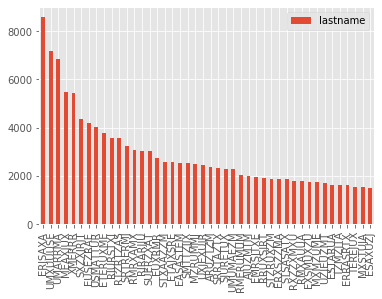

In [209]:
df_l = df_L.head(44)
df_l1 = pd.DataFrame(data=df_l)
df_l1.plot(kind='bar')

In [219]:
df_a = df['address'].value_counts()
count=0
for i in df_a.index:
    if df_a[i] >= 30:
        count+=1
    else:
        count+=0
print(count)

26


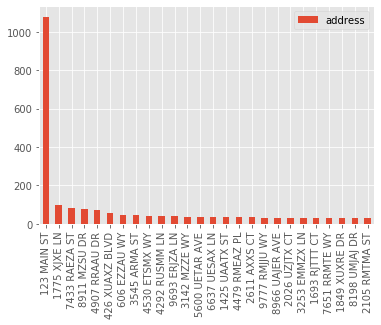

In [220]:
df_ad = df_a.head(26)
df_ad1 = pd.DataFrame(data=df_ad)
df_ad1.plot(kind='bar')

In [230]:
df_z = df['zip5'].value_counts()
count=0
for i in df_z.index:
    if df_z[i] >= 350:
        count+=1
    else:
        count+=0
print(count)
df_z

41


68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
37527      1
54496      1
73481      1
52531      1
69618      1
Name: zip5, Length: 26370, dtype: int64

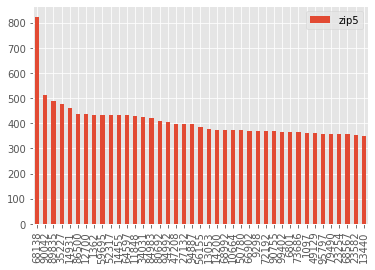

In [229]:
df_zip = df_z.head(41)
df_zip1 = pd.DataFrame(data=df_zip)
df_zip1.plot(kind='bar')

In [247]:
df_d = df['dob'].value_counts()
count=0
for i in df_d.index:
    if df_d[i] >= 45:
        count+=1
    else:
        count+=0
print(count)
df_d

37


1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
               ...  
1986-03-13         5
1944-11-27         5
1928-07-30         5
1931-09-21         5
2003-05-15         5
Name: dob, Length: 42673, dtype: int64

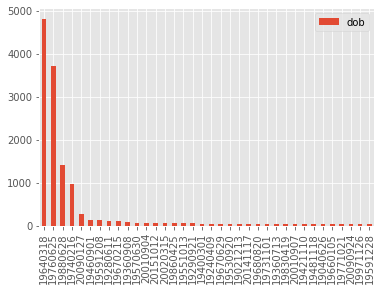

In [248]:
df_dob = df_d.head(37)
df_dob1 = pd.DataFrame(data=df_dob)
df_dob2.plot(kind='bar')

In [255]:
df_h = df['homephone'].value_counts()
count=0
for i in df_h.index:
    if df_h[i] >= 100:
        count+=1
    else:
        count+=0
print(count)
df_h

22


9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
9296466299        1
6970852322        1
1925750863        1
5265623318        1
1625814675        1
Name: homephone, Length: 28244, dtype: int64

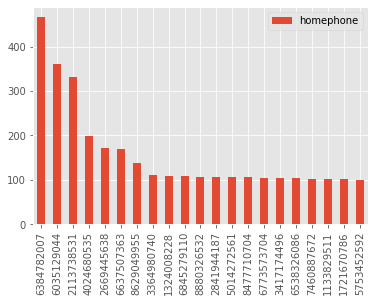

In [257]:
df_home = df_h.head(22)
df_home1 = pd.DataFrame(data=df_home)
df_home2 = df_home1.drop(index=9999999999)
df_home2.plot(kind='bar')